<a href="https://colab.research.google.com/github/Alxn-z/Diplomado-Inteligencia-Artificial-PLN/blob/PLN/Tweets3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
#

In [ ]:
#texto=pd.read_csv('spam.csv',encoding='latin-1')
texto=pd.read_csv('/content/Tweets.csv')
texto.sample(100)

,textID,text,selected_text,sentiment
2705,fede88d585,Comment my new myspace pictures plz?,Comment my new myspace pictures plz?,neutral
6342,33a7b1e26b,"enough for today, good night all",good,positive
23226,73c63767ce,"Either way, that`s unfortunate to hear Than...",", that`s unfortunate to hear Thanks you both ...",neutral
22324,3c14b2b292,[Somewhere - Within Temptation] returned to my...,hard,negative
1894,04d529a0ae,The sun is wonderful but makes me feel incredi...,The sun is wonderful but makes me feel incredi...,neutral
...,...,...,...,...
1272,49839339e8,Yeah Yeah Yeahs - Softshock,Yeah Yeah Yeahs - Softshock,neutral
26810,ca44ccebe4,lol nice I loved that concert! Aha u gonna p...,I loved,positive
21135,56a213f8f5,I can understand the fear. I feel that way ab...,fear.,negative
25003,a962fad818,On the plane to yosemite. Forgot my laptop at ...,On the plane to yosemite. Forgot my laptop at ...,neutral


In [ ]:
texto["sentiment"].value_counts()

,count
sentiment,
neutral,11118
positive,8582
negative,7781


In [ ]:
remplazo={"neutral":0,"negative":1,"positive":2}
texto["sentiment"]=texto["sentiment"].map(remplazo)

In [ ]:
texto.sample(100)

,textID,text,selected_text,sentiment
23867,19a8720477,"Gain an instant follower, just use the #**** ...","Gain an instant follower, just use the #**** t...",0
4636,feea5525dc,Down again seems like it never gonna stop an...,d I`ll never get what i want,1
25914,9dfbce2988,did you drink too much? the best cure is a fr...,did you drink too much? the best cure is a fry up,0
23176,c59b23d306,"Uh, yeah. Totally. But then again, I am in ...","Uh, yeah. Totally. But then again, I am in r...",0
23881,595b764513,Goddamnit! If we live in an age of constant co...,Goddamnit!,1
...,...,...,...,...
7712,7dd007de22,Meant to ask how did the other night go? Did ...,enjoy,2
21225,b3157ffa60,Back to work,Back to work,0
20333,5c47380aef,TextMate crashed for the first time in 3 month...,crashed for the first time in 3 months. Not to...,0
5038,7372afb42a,now my heart isnt cold but im still missing ...,t im still missing you.,1


In [ ]:
texto["sentiment"].value_counts()

,count
sentiment,
0,11118
2,8582
1,7781


In [ ]:
texto.dropna(inplace=True)

In [ ]:
texto

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1
2,088c60f138,my boss is bullying me...,bullying me,1
3,9642c003ef,what interview! leave me alone,leave me alone,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",1
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,1
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",1
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,2


In [ ]:
texto["sentiment"].value_counts()

,count
sentiment,
0,11117
2,8582
1,7781


In [ ]:
#X,y=texto["text"],texto["sentiment"]
X,y=texto["selected_text"],texto["sentiment"]

In [ ]:
X

,selected_text
0,"I`d have responded, if I were going"
1,Sooo SAD
2,bullying me
3,leave me alone
4,"Sons of ****,"
...,...
27476,d lost
27477,", don`t force"
27478,Yay good for both of you.
27479,But it was worth it ****.


In [ ]:
y

,sentiment
0,0
1,1
2,1
3,1
4,1
...,...
27476,1
27477,1
27478,2
27479,2


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))

In [ ]:
X_Vectorizado = vectorizer.fit_transform(X)

In [ ]:
X_Vectorizado

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 325647 stored elements and shape (27480, 103593)>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Vectorizado, y, test_size=0.2, random_state=42)

In [ ]:
#definimos el modelo
modelo=MultinomialNB(alpha=0.1)

In [ ]:
#entrenamos el modelo
modelo.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [ ]:
ypredTest=modelo.predict(X_test)

In [ ]:
mx=confusion_matrix(y_test,ypredTest)
mx

array([[ 963,  743,  530],
       [ 167, 1236,  169],
       [ 131,   83, 1474]])

<Axes: >

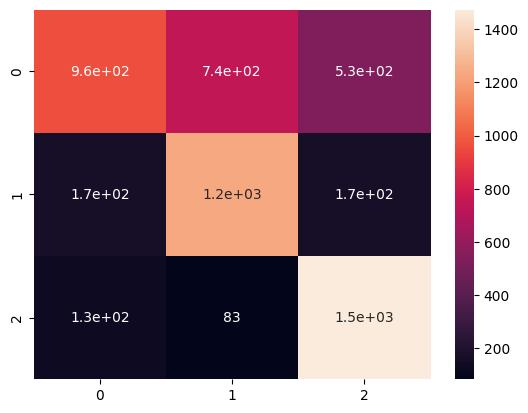

In [ ]:
sns.heatmap(mx,annot=True)

In [ ]:
print(classification_report(y_test,ypredTest))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55      2236
           1       0.60      0.79      0.68      1572
           2       0.68      0.87      0.76      1688

    accuracy                           0.67      5496
   macro avg       0.68      0.70      0.66      5496
weighted avg       0.69      0.67      0.65      5496

